# kNN, Naive-Bayes 연습

* concrete 데이터를 이용해서 kNN과 Naive-Bayes (NB) 분류를 연습해봄.
* target label은 Concrete compressive strength이며, 이 target label을 category로 변경해서 분류 알고리즘에 적용

## 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 파일 불러오기

In [2]:
concrete = pd.read_excel('datasets/Concrete_Data.xls')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
concrete.shape

(1030, 9)

9개의 column으로 구성되어 있으며, 총 1030 데이터 세트로 구성되어 있는 데이터임.

In [4]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

column명을 보면 cement~fine agg가 8개의 구성 성분이고 그 구성 성분의 함량으로 concrete compressive strength가 결정되는 것으로 보임.

In [5]:
column_name = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate',
              'Age', 'Concrete compressive strength']
concrete.columns = column_name
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


column명을 간단하게 변경함.

In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


    Age의 data type은 int, 나머지는 float의 형태를 갖고 있음.
    
    모든 컬럼에는 null값이 없음.

## EDA

/Users/ichanghun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ichanghun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ichanghun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='Age', ylabel='Density'>

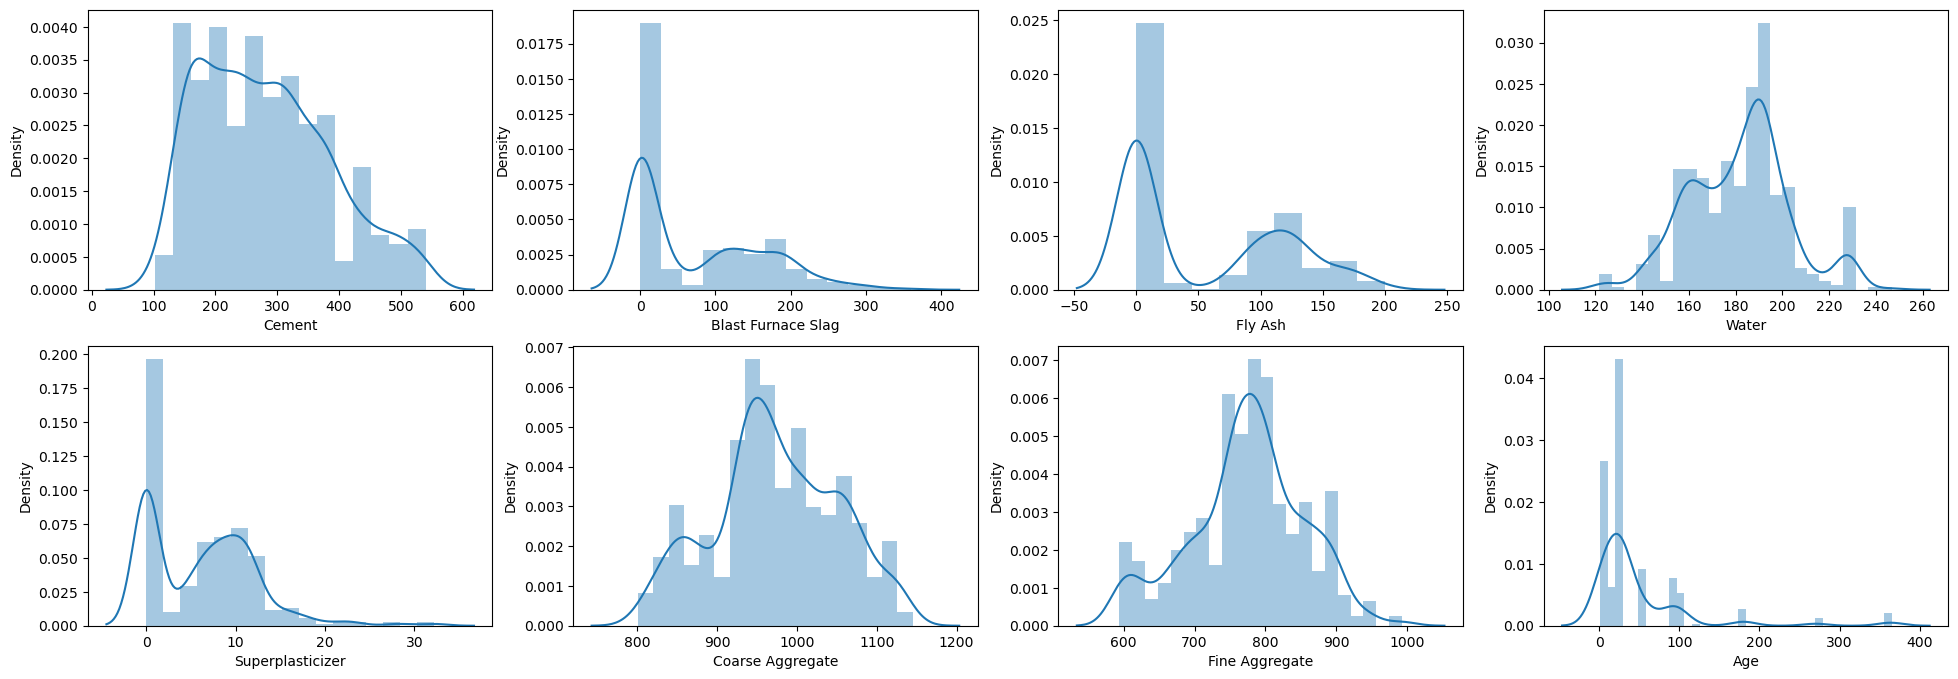

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 4)
fig.set_size_inches(24,8)
sns.distplot(concrete['Cement'], ax=axes[0][0])
sns.distplot(concrete['Blast Furnace Slag'], ax=axes[0][1])
sns.distplot(concrete['Fly Ash'], ax=axes[0][2])
sns.distplot(concrete['Water'], ax=axes[0][3])
sns.distplot(concrete['Superplasticizer'], ax=axes[1][0])
sns.distplot(concrete['Coarse Aggregate'], ax=axes[1][1])
sns.distplot(concrete['Fine Aggregate'], ax=axes[1][2])
sns.distplot(concrete['Age'], ax=axes[1][3])

    *Blast Furnace Slags, Fly Ash, Superplascticizer의 컬럼에서 0의 값이 많이 나타남. 
     실제 콘크리트를 배합할 때 투입하지 않은 경우이거나, 값이 누락되어 0으로 입력하였을 수 있음.
     회귀 분석을 하는 경우라면 0이 많은 변수들에 의해 예측되는 값의 정확도가 떨어질 수도 있겠다는 생각이 들지만, 이번 분석은 분류이므로 0에 대한 
     특별한 처리 없이 진행하고자 한다.
    *Age 데이터의 경우, outlier로 보이는 데이터가 일부 확인되는 것으로 보임. boxplot을 그려 확인해보고자 함.

<AxesSubplot:ylabel='Age'>

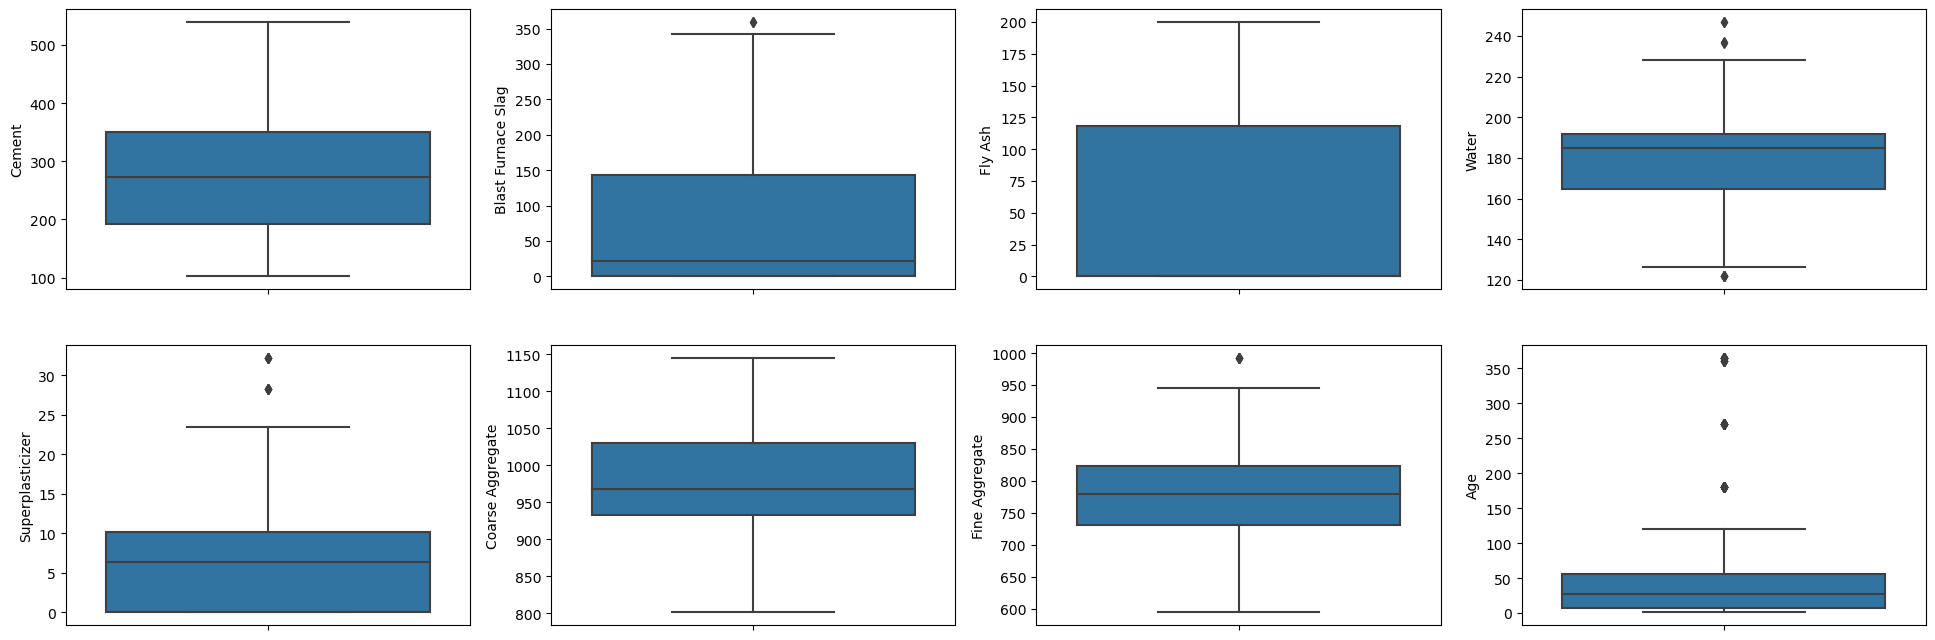

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 4)
fig.set_size_inches(24,8)
sns.boxplot(data = concrete, y = 'Cement', ax=axes[0][0])
sns.boxplot(data = concrete, y = 'Blast Furnace Slag', ax=axes[0][1])
sns.boxplot(data = concrete, y = 'Fly Ash', ax=axes[0][2])
sns.boxplot(data = concrete, y = 'Water', ax=axes[0][3])
sns.boxplot(data = concrete, y = 'Superplasticizer', ax=axes[1][0])
sns.boxplot(data = concrete, y = 'Coarse Aggregate', ax=axes[1][1])
sns.boxplot(data = concrete, y = 'Fine Aggregate', ax=axes[1][2])
sns.boxplot(data = concrete, y = 'Age', ax=axes[1][3])

    * Age에서 범위를 크게 벗어난 값이 확인됨.
    * outlier를 평균+(-) 3* 표준편차 값으로 계산하여, 각 컬럼에서 얼마나 outlier가 존재한는지 확인하고자 함.

In [9]:
column_name_var = column_name[:-1]
for col in column_name_var:
    upperB = concrete[col].mean() + 3*concrete[col].std()
    lowerB = concrete[col].mean() - 3*concrete[col].std()
    
    outlier = (concrete[col] > upperB) | (concrete[col] < lowerB)
    print(f'{col}: {len(concrete.loc[outlier])}')

Cement: 0
Blast Furnace Slag: 4
Fly Ash: 0
Water: 2
Superplasticizer: 10
Coarse Aggregate: 0
Fine Aggregate: 0
Age: 33


    * Blast Furnace Slag, Water, Superplasticizer, Age의 변수 column에서 outlier가 확인되었다.
    * 이 outlier들이 비정상적인 값 일수도 있지만, 실제 target값인 강도에 영향을 줄 수도 있기 때문에 target값과의 관계를 확인한 후에 처리 
      여부를 결정하고자 한다.

/Users/ichanghun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Concrete compressive strength'>

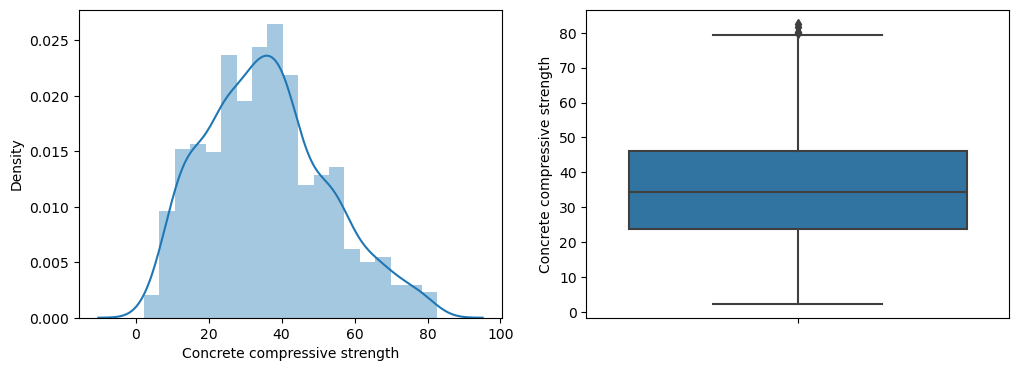

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,4)
sns.distplot(concrete['Concrete compressive strength'], ax=ax1)
sns.boxplot(data = concrete, y = 'Concrete compressive strength', ax=ax2)

    * 완전한 정규분포는 아니지만, 중앙을 기준으로 고르게 분포가 되어 있음.

In [11]:
col_name = 'Concrete compressive strength'
upperB = concrete[col_name].mean() + 3*concrete[col_name].std()
lowerB = concrete[col_name].mean() - 3*concrete[col_name].std()
    
outlier = (concrete[col_name] > upperB) | (concrete[col_name] < lowerB)
print(f'{col_name}: {len(concrete.loc[outlier])}')

Concrete compressive strength: 0


    * Target label인 Concrete compressive strength에서는 outlier가 없음.

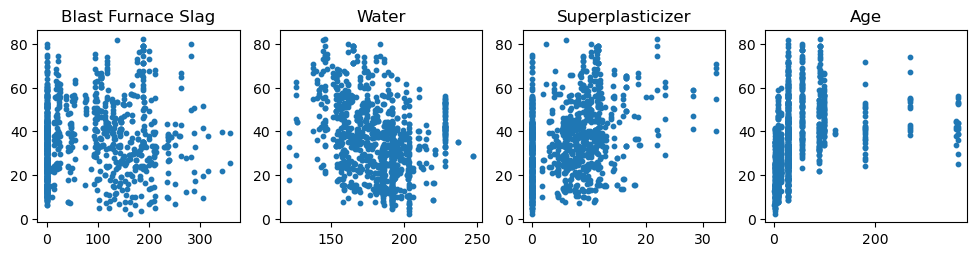

In [12]:
col_list = ['Blast Furnace Slag', 'Water', 'Superplasticizer', 'Age']
fig, axes = plt.subplots(ncols = 4)
fig.set_size_inches(12,2.5)

for i, col in enumerate(col_list):
    axes[i].scatter(concrete[col], concrete[col_name], s=10)
    axes[i].set_title(col)

<AxesSubplot:xlabel='Age', ylabel='Concrete compressive strength'>

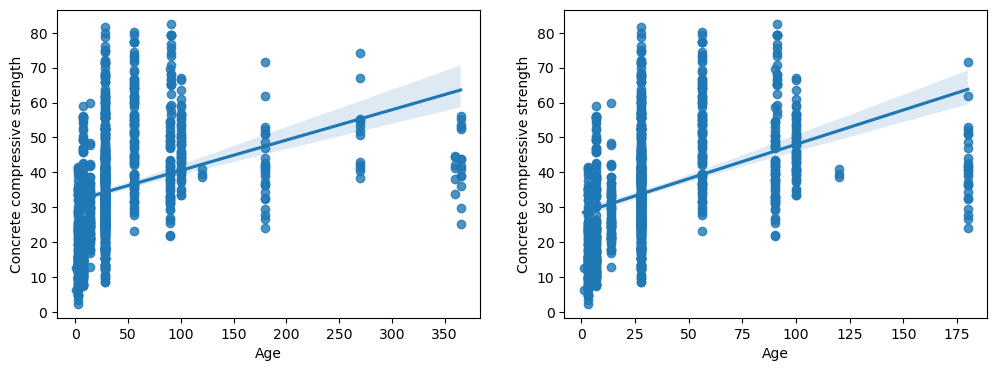

In [13]:
upperB_Age = concrete['Age'].mean() + 3*concrete['Age'].std()
concrete2 = concrete[concrete['Age'] < upperB_Age]

fig, axes = plt.subplots(ncols = 2)
fig.set_size_inches(12,4)

sns.regplot(data = concrete, x = 'Age', y = 'Concrete compressive strength', ax = axes[0])
sns.regplot(data = concrete2, x = 'Age', y = 'Concrete compressive strength', ax = axes[1])

    * Age의 경우, outlier 영역의 데이터와 target label의 관계성이 떨어지는 것도 보임.
    * outlier를 제거한 후, target label과의 상관도가 높아지는 것으로 보임.
      => 별도의 데이터 치환없이 Age의 outlier를 제거하고 분류를 진행하고자 함. (concrete2 사용)